<a href="https://colab.research.google.com/github/lazy-wolf/python-class-notes/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 05-10-2023
```








**Import Libraries**

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from google.colab import drive

**Mounting Google Drive in Google Colab**

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


**Load custom images from Google Drive**

In [8]:
# Load custom images from Google Drive
custom_images = []
custom_labels = []
base_folder_path = '/content/drive/MyDrive/TME_6015/Assignment_1'
for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)
    print(folder_path)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
          print('filename', filename)
          if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.JPG') or filename.endswith('.jpg'):
              img_path = os.path.join(folder_path, filename)
              img = Image.open(img_path).convert('L')  # convert image to grayscale
              img = img.resize((28, 28))  # resize image to match MNIST data
              img = img.rotate(-90)
              threshold = 100
              img = img.point(lambda p: p > threshold and 255)
              img_array = np.array(img)
              custom_images.append(img_array)
              custom_labels.append(int(folder_name))  # use folder name as label

# Convert the list of custom images and labels to numpy arrays
custom_images = np.array(custom_images)
custom_labels = np.array(custom_labels)

# Preprocess the custom images
custom_images = custom_images / 255.0

/content/drive/MyDrive/TME_6015/Assignment_1/7
filename 7-1.jpg
filename 7-2.png
filename 7-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/1
filename 1-1.jpg
filename 1-2.png
filename 1-3`.png
/content/drive/MyDrive/TME_6015/Assignment_1/2
filename 2-1.jpg
filename 2-2.png
filename 2-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/3
filename 3-1.jpg
filename 3-2.png
filename 3-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/4
filename 4-1.jpg
filename 4-2.png
filename 4-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/5
filename 5-1.jpg
filename 5-2.png
filename 5-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/6
filename 6-1.jpg
filename 6-2.png
filename 6-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/8
filename 8-1.jpg
filename 8-2.png
filename 8-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/9
filename 9-1.jpg
filename 9-2.png
filename 9-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/0
filename 0-1.jpg
filename 0-2.png
filename 0-3.png


In [18]:
display_image = custom_images[2] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)

# Display the image
img

**Plotting the data**

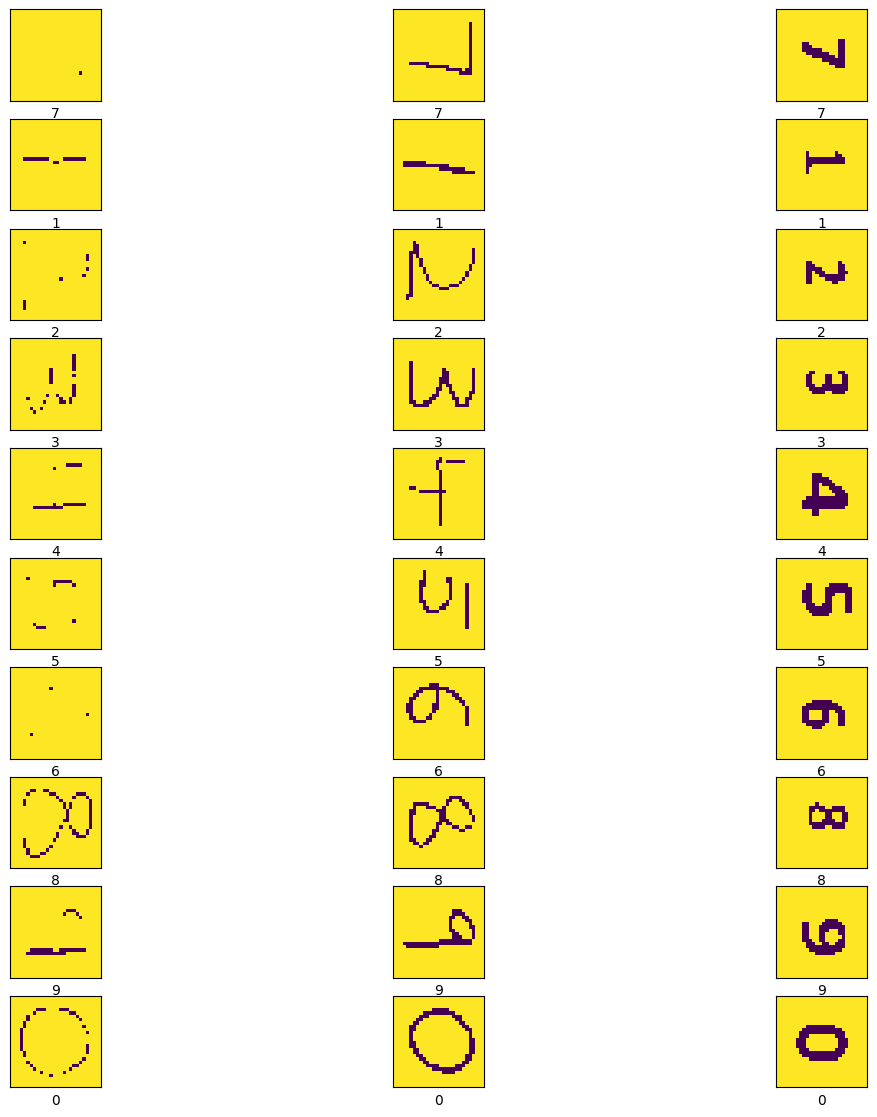

In [12]:
plt.figure(figsize=(14,14))
for i in range(30):
    plt.subplot(10,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(custom_images[i])
    plt.xlabel(custom_labels[i])
plt.show()

**Load and Preprocess MNIST Dataset**

In [13]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**Adding the custom images and labels to the original MNIST dataset**

In [19]:
# Add the custom images and labels to the original MNIST dataset
x_train = np.concatenate((x_train, custom_images), axis=0)
y_train = np.concatenate((y_train, custom_labels), axis=0)

In [20]:
display_image = x_train[0] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)
img

**Create a Model**

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

**Compile and Train the Model**

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 75s 39ms/step - loss: 0.2235 - accuracy: 0.9445 - val_loss: 0.0783 - val_accuracy: 0.9758
Epoch 2/10
1876/1876 [==============================] - 67s 36ms/step - loss: 0.0630 - accuracy: 0.9804 - val_loss: 0.0717 - val_accuracy: 0.9783
Epoch 3/10
1876/1876 [==============================] - 81s 43ms/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0444 - val_accuracy: 0.9860
Epoch 4/10
1876/1876 [==============================] - 73s 39ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0388 - val_accuracy: 0.9877
Epoch 5/10
1876/1876 [==============================] - 62s 33ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0395 - val_accuracy: 0.9879
Epoch 6/10
1876/1876 [==============================] - 59s 31ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0447 - val_accuracy: 0.9892
Epoch 7/10
1876/1876 [==============================] - 78s 42ms/step - loss: 0.0304 - accuracy: 0.9912 - val_loss: 0.0583 -

**Plot Training History**

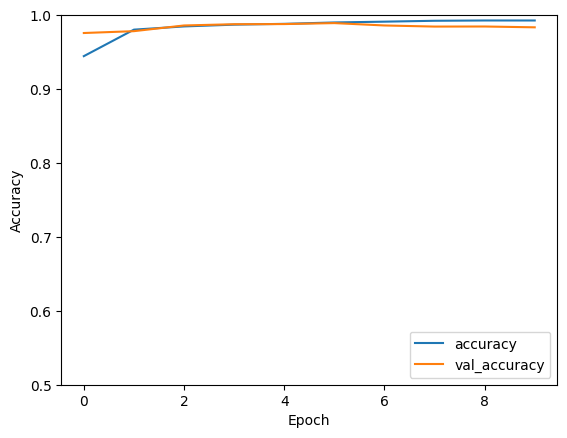

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

**Detect Overfitting**

---

We will Train the model for more epochs until you observe overfitting in the training data (i.e., when validation accuracy starts decreasing while training accuracy keeps increasing).

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train, epochs=25,
                    validation_data=(x_test, y_test))

Epoch 1/25
1876/1876 [==============================] - 72s 38ms/step - loss: 0.1792 - accuracy: 0.9524 - val_loss: 0.0615 - val_accuracy: 0.9810
Epoch 2/25
1876/1876 [==============================] - 72s 39ms/step - loss: 0.0630 - accuracy: 0.9809 - val_loss: 0.0684 - val_accuracy: 0.9809
Epoch 3/25
1876/1876 [==============================] - 61s 33ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0725 - val_accuracy: 0.9779
Epoch 4/25
1876/1876 [==============================] - 59s 32ms/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0428 - val_accuracy: 0.9861
Epoch 5/25
1876/1876 [==============================] - 59s 31ms/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 0.0562 - val_accuracy: 0.9845
Epoch 6/25
1876/1876 [==============================] - 59s 31ms/step - loss: 0.0359 - accuracy: 0.9888 - val_loss: 0.0450 - val_accuracy: 0.9867
Epoch 7/25
1876/1876 [==============================] - 59s 31ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0471 -

313/313 - 3s - loss: 0.1094 - accuracy: 0.9862 - 3s/epoch - 11ms/step


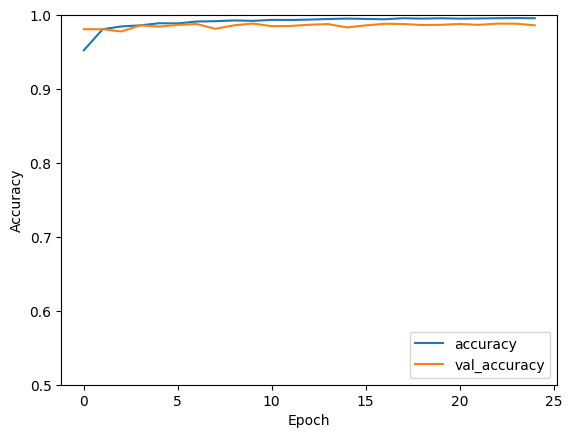

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [29]:
print(test_acc)

0.9861999750137329


**Experiment with Different Configurationst**

**Model - 1**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
print(test_acc)

**Model - 2**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
print(test_acc)

**Create a Custom Test Set**

In [30]:
custom_test_images = []
custom_test_labels = []
folder_path = '/content/drive/MyDrive/TME_6015/Assignment_1_Custom_Test_Data'
for filename in os.listdir(folder_path):
  print('filename : ', filename)
  if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.JPG') or filename.endswith('.jpg') or filename.endswith('.JPEG') or filename.endswith('.jpeg'):
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    custom_test_images.append(img_array)
    custom_test_labels.append(int(filename[0]))

# Convert the list of custom images and labels to numpy arrays
custom_test_images = np.array(custom_test_images)
custom_test_labels = np.array(custom_test_labels)


FileNotFoundError: ignored

In [ ]:
custom_test_pred=model.predict(custom_test_images)

In [ ]:
list(map(lambda p: np.argmax(p), custom_test_pred))